In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import re
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
data_path = pathlib.Path("../data/raw/PlantVillage")

In [3]:
print(os.listdir(data_path))

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [8]:
category_count = []

for root, dirs, files in os.walk(data_path):
    for dir_path in dirs:
        category_count.append((dir_path, len(os.listdir(root+os.sep+dir_path))))

In [11]:
count_df = pd.DataFrame(category_count, columns=['Category', 'Count'])
count_df.head()

,Category,Count
0,Apple___Apple_scab,630
1,Apple___Black_rot,621
2,Apple___Cedar_apple_rust,275
3,Apple___healthy,1645
4,Blueberry___healthy,1502


In [12]:
total_images = count_df['Count'].sum()
total_images

54305

In [14]:
num_of_categories = len(count_df)
num_of_categories

38

[]

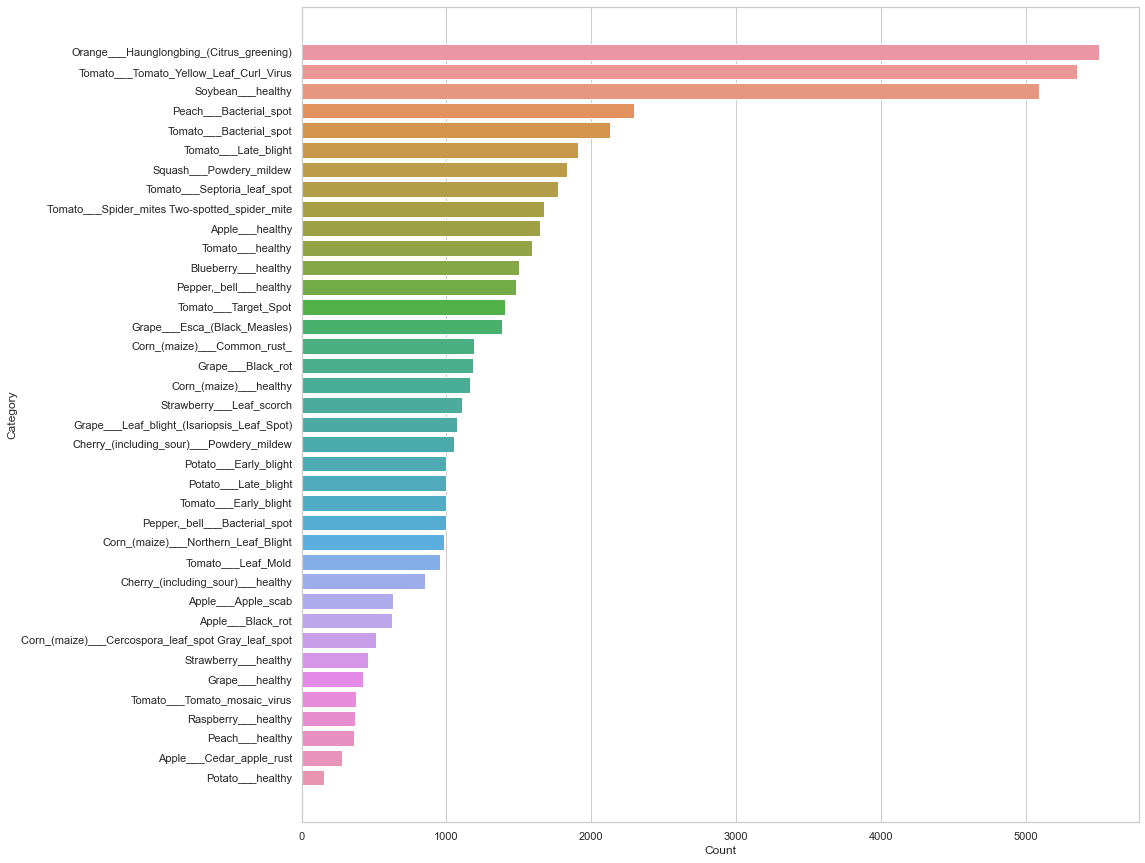

In [21]:
count_df = count_df.sort_values(by='Count', ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(x="Count", y="Category", data=count_df)
plt.plot()

In [22]:
healthy_images_count = count_df[count_df['Category'].str.endswith("healthy")]['Count'].sum()
healthy_images_count

15084

In [23]:
disease_images_count = total_images - healthy_images_count
disease_images_count

39221

[]

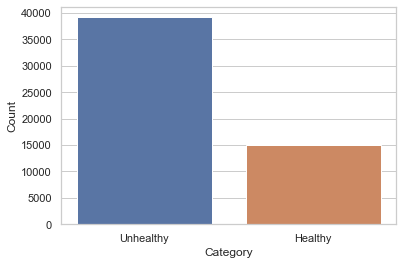

In [24]:
temp_df = pd.DataFrame(data=[("Unhealthy", disease_images_count), ("Healthy", healthy_images_count)], columns=['Category', 'Count'])
sns.barplot(y="Count",x="Category", data=temp_df)
plt.plot()

In [26]:
healthy_cat = len(count_df[count_df['Category'].str.endswith('healthy')])
print("healthy_cat",healthy_cat)
print("unhealthy_cat",num_of_categories - healthy_cat)

healthy_cat 12
unhealthy_cat 26


[]

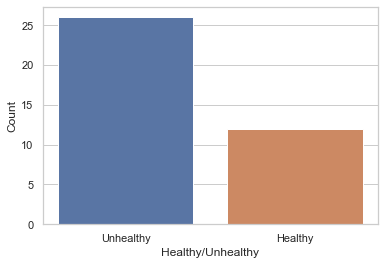

In [31]:
healthy_cat_df = pd.DataFrame(data=[("Unhealthy", num_of_categories - healthy_cat), ("Healthy", healthy_cat)], columns=['Healthy/Unhealthy', 'Count'])
sns.barplot(y="Count",x="Healthy/Unhealthy", data=healthy_cat_df)
plt.plot()